In [1]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# The NetworkX graph library

[NetworkX](http://networkx.github.io) is one of the most commonly-used graph libraries for Python because it has a huge collection of built-in algorithms. It contains a simple interface for constructing both directed and undirected graphs, and performing a wide range of analyses. However, if you want to process really large graphs (more than a million nodes/edges) you might want to use the [snap library](https://snap.stanford.edu/) instead.

### Creating graphs

Let's start by importing the library and creating a graph.  Since the many more complex algorithms differ for directed and undirected graphs, NetworkX has separate classes for the two categories of graphs: `Graph` and `DiGraph` objects.

In [4]:
%pip install networkx

                                              0.0/2.1 MB ? eta -:--:--
     ---                                      0.2/2.1 MB 5.9 MB/s eta 0:00:01
     -------                                  0.4/2.1 MB 5.1 MB/s eta 0:00:01
     ----------------                         0.8/2.1 MB 7.5 MB/s eta 0:00:01
     -----------------------                  1.2/2.1 MB 7.9 MB/s eta 0:00:01
     -------------------------------          1.6/2.1 MB 7.9 MB/s eta 0:00:01
     --------------------------------------   2.0/2.1 MB 7.4 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 7.3 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import networkx as nx
G_undirected = nx.random_regular_graph(2, 30)
#G_directed = nx.DiGraph()
#print(G_undirected.nodes())
G_undirected.edges()
#nx.draw(G_undirected, with_labels=False)

EdgeView([(1, 28), (1, 25), (28, 15), (18, 23), (18, 9), (23, 15), (12, 16), (12, 24), (16, 7), (20, 26), (20, 4), (26, 10), (21, 25), (21, 19), (5, 22), (5, 27), (22, 8), (19, 17), (2, 14), (2, 4), (14, 3), (13, 17), (13, 6), (0, 29), (0, 6), (29, 27), (7, 11), (24, 9), (10, 8), (3, 11)])

Nodes:  113
Edges:  3027


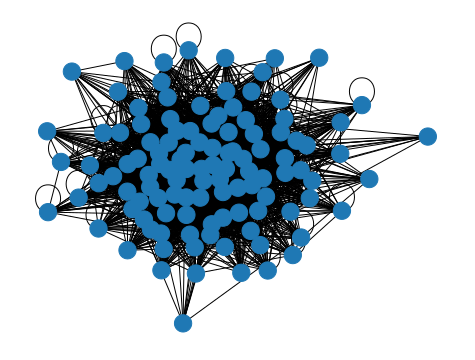

In [6]:
G = nx.read_edgelist("edgelist-business.txt")

print("Nodes: ", len(G.nodes()))
print("Edges: ", len(G.edges()))
nx.draw(G, with_labels=False)

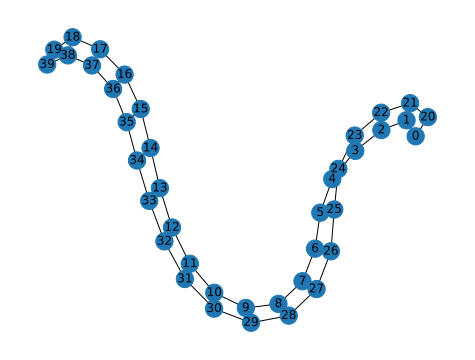

In [7]:
G=nx.ladder_graph(20)
nx.draw(G, with_labels=True)

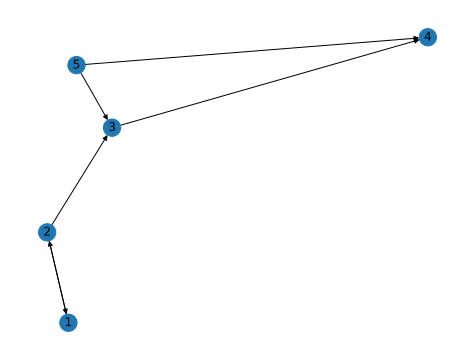

In [8]:
D=nx.DiGraph()
D.add_edge(1,2)
D.add_edge(2,1)
D.add_edges_from([(2,3),(3,4),(5,4), (5,3)])
nx.draw(D, with_labels=True)

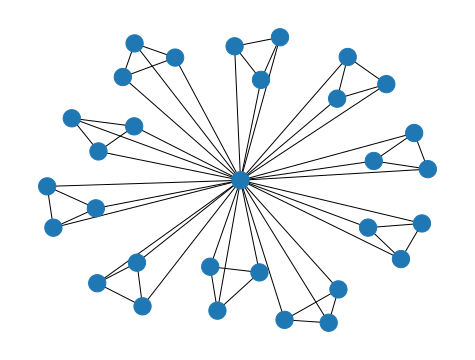

In [9]:
G = nx.windmill_graph(10, 4)
nx.draw(G, with_labels=False)

Nodes in a NetworkX can be any hashable type (i.e., any type that can be used as a key in a dictionary, and in fact as we will see shortly, Network uses the adjacency dictionary representation of the graph internally).  We can add nodes using the `.add_node()` and `.add_nodes_from()` calls.  Similarly, we can remove nodes using the `.remove_node()` or `.remove_nodes_from()` calls.  Finally, a list of nodes can be given by the `.nodes()` call.

['A', 'B', 'C', 'D', 'E', 'F']


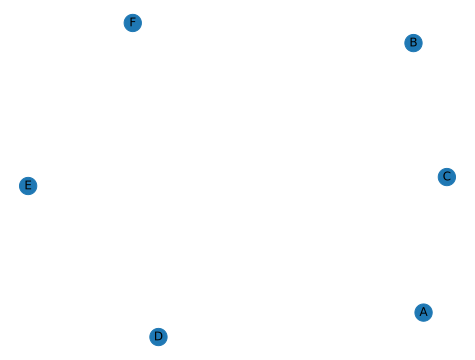

In [10]:
G = nx.Graph()
G.add_node("A")
G.add_nodes_from(["B","C", "D", "E", "F"])
print(G.nodes())

nx.draw(G, with_labels=True)

['B', 'D', 'E', 'F']
['D', 'E', 'F', 'A', 'C']


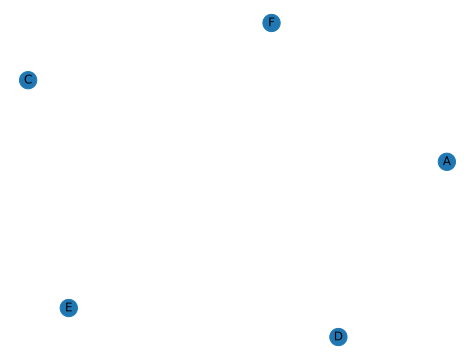

In [11]:
G.remove_nodes_from(["A", "C"])
print(G.nodes())
G.add_nodes_from(["A", "C"])
G.remove_node("B")
print(G.nodes())

nx.draw(G, with_labels=True)

Edges can be added and removed from the graph using using the `.add_edge()` (add a single edge), `.add_edges_from()` (add a sequence of edges from a list), `.remove_edge()` and `remove_edges_from()` (similar to before).  Note that we can add edges between nodes that do not exist, and the relevant nodes are automatically added to the graph (for this reason, it is more common to simply add edges, rather than add nodes and edges separately, when constructing a graph).  Like the `.nodes()` call the `.edges()` call returns a list of edges in the graph, represented as tuples

['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]


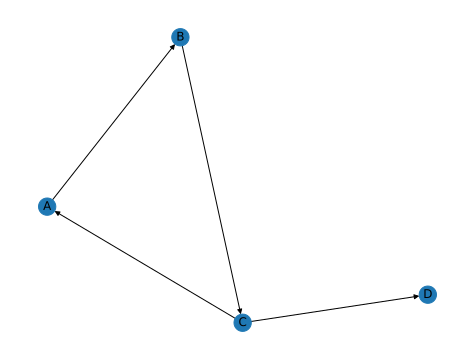

In [12]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(G.nodes())
print(G.edges())

nx.draw(G, with_labels=True)

[('B', 'C'), ('C', 'A'), ('C', 'D')]


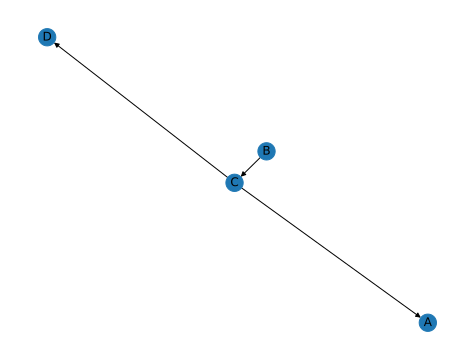

In [13]:
G.remove_edge("A","B") 
print(G.edges())

nx.draw(G, with_labels=True)

[('C', 'A'), ('C', 'D')]


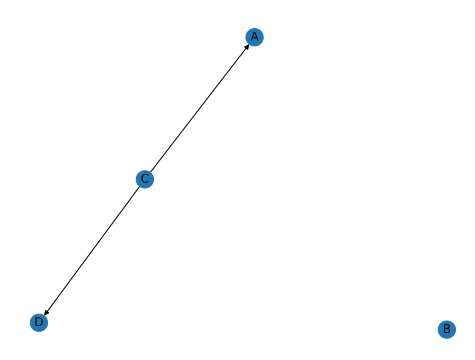

In [14]:
G.remove_edges_from([("A","B"), ("B","C")])
print(G.edges())

nx.draw(G, with_labels=True)

Removing a node will remove all the edges connected to that node.

[('B', 'C'), ('C', 'D')]


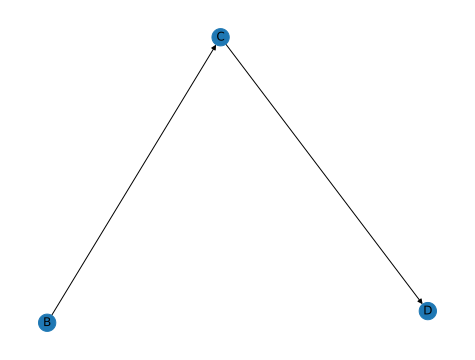

In [15]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
G.remove_node("A")
print(G.edges())

nx.draw(G, with_labels=True)

We can also add weights to edges via the `weight` attribute, though as we see, this is just a special case of more general edge attributes.

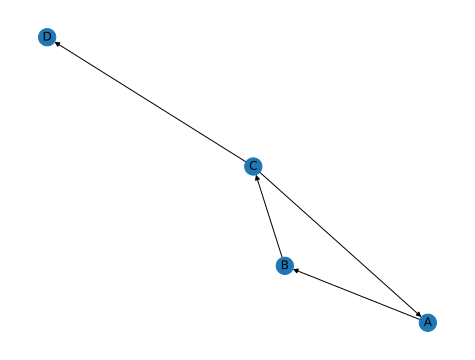

In [16]:
G = nx.DiGraph()
G.add_edge("A","B", weight=1.0)
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")], weight="4.0")

nx.draw(G, with_labels=True)

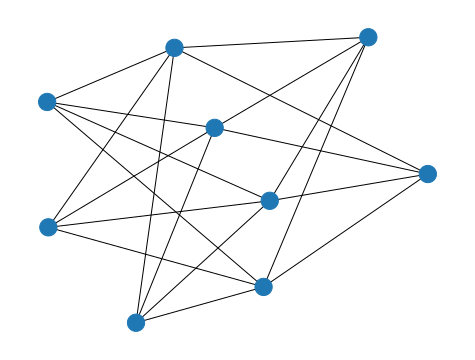

In [17]:
B=nx.complete_bipartite_graph(4,5)
nx.draw(B)


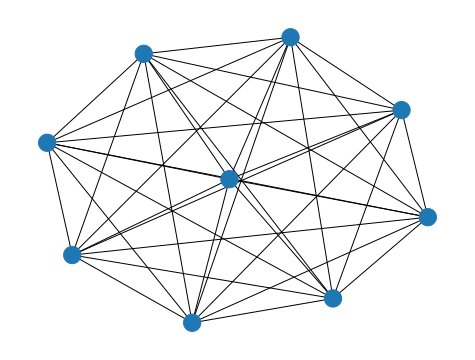

In [18]:
C=nx.complete_graph(9)
nx.draw(C)

### Internal representations and node/edge data

Internally, NetworkX uses the adjacency dictionary representation to represent the graph.  We can access these elements by just indexing into the graph object itself.

In [19]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(G["C"])

{'A': {}, 'D': {}}


Remember that in an adjacency dictionary representation, the value for key "C" would be a dictionary, with keys corresponding to the nodes that "C" is connected to, just as we see above.  Note that by default, the value in this inner dictionary is itself an (empty) dictionary.  This dictionary is precisely where we store any relevant attributes for this edge.  For example, to add a "color" attribute to an edge, we just add the key/value pair to the edge.

In [20]:
G["A"]["B"]["color"] = "red"

The weight of an edge is just another attribute of this type, but NetworkX will know to treat the "weight" parameter properly for several of the underlying graph algorithms.

In [21]:
G["A"]["B"]["weight"] = 1.0
print(G["A"]["B"])

{'color': 'red', 'weight': 1.0}


Obviously, node attributes cannot be added in quite the same way: the `G["A"]` dictionary couldn't be a method for adding node properties, as this is already how we represent the edges of node "A".  Instead, if we want to add node properties we use the `.node` property.

In [23]:
G.nodes["A"]["color"] = "blue"
print(G.nodes["A"])

{'color': 'blue'}


Finally, the `.nodes()` and `.edges()` lists by default will not return any of the attributes.

In [24]:
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]


If we want to data returned too, we need to pass the `data=True` argument.

In [25]:
print(G.nodes(data=True))
print(G.edges(data=True))

[('A', {'color': 'blue'}), ('B', {}), ('C', {}), ('D', {})]
[('A', 'B', {'color': 'red', 'weight': 1.0}), ('B', 'C', {}), ('C', 'A', {}), ('C', 'D', {})]


### Graph algorithms

Finally, NetworkX has a large number of graph algorithms built in.  A full list is here: [NetworkX algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/index.html).  Let's look at just the the shortest path algorithm mentioned in class. 

In [26]:
G = nx.Graph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(nx.shortest_path_length(G, source="A"))
print(nx.shortest_path(G, source="A"))

{'A': 0, 'B': 1, 'C': 1, 'D': 2}
{'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'C', 'D']}


## References

* [NetworkX library](http://networkx.github.io)